## Raw Cell Image to Nematic Field to Defect

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from cellpose import plot
import os
from scipy.signal import find_peaks
from skimage.measure import label, regionprops, regionprops_table
from skimage.color import label2rgb
import pandas as pd
import glob
import pathlib
import seaborn as sns
from pip._internal.cli.progress_bars import get_download_progress_renderer
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# warnings.filterwarnings("ignore")

import sys
sys.path.append('../vasco_scripts')  # add the relative path to the folder
from defects import *  # import the module from the folder

c:\Users\victo\miniconda3\envs\cellpose\lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


(-0.5, 2047.5, 2047.5, -0.5)

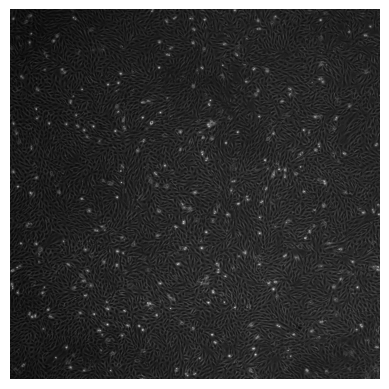

In [2]:
im_path = r"C:\Users\victo\Downloads\SB_lab\RPE1_C2C12_\RPE1_Segmentation\RPE1_s1_phase.tif"
images = []
ret, images = cv2.imreadmulti(mats=images,
                            filename=im_path,
                            start=150,
                            count=-1,
                            flags=cv2.IMREAD_ANYCOLOR)
len(images)
plt.imshow(images[0], "gray")
plt.axis("off")

In [3]:
%matplotlib qt
# Read the image in grayscale
img = images[-100]

# Apply Histogram Equalization
img_eq = cv2.equalizeHist(img)

# Apply Contrast Limited Adaptive Histogram Equalization
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
img_clahe = clahe.apply(img)

# Display the original image, histogram equalized image and CLAHE image
fig, axs  = plt.subplots(1,3,figsize=(20, 5))

axs[0].imshow(img, "gray"); axs[0].set_title("Original"); axs[0].axis("off")
axs[1].imshow(img_eq, "gray"); axs[1].set_title("Histogram equalized"); axs[1].axis("off") 
axs[2].imshow(img_clahe, "gray"); axs[2].set_title("CLAHE - Adaptive Histogram"); axs[2].axis("off") 


(-0.5, 2047.5, 2047.5, -0.5)

In [4]:
img = clahe.apply(images[-100])
shift = 1/2 
pix_x = img.shape[1]
pix_y = img.shape[0]

x = np.arange(0,pix_x)
y = np.arange(0,pix_y)

xx, yy = np.meshgrid(x, y)
ori, coh, E = orientation_analysis(img, 25)
k = compute_topological_charges(-ori, int_area='cell', origin='lower')
defects = localize_defects(k, x_grid=xx, y_grid=yy)
compute_defect_orientations(-ori, defects, method='interpolation', x_grid=x, y_grid=y, interpolation_radius=5,  min_sep=1)

In [5]:
plushalf = defects[defects['charge']==.5]
minushalf = defects[defects['charge']==-.5]

In [6]:
%matplotlib qt
fig, ax  = plt.subplots(figsize=(16,16))
s = 21
ax.imshow(img, cmap='gray', origin='lower')
ax.quiver(xx[::s,::s], yy[::s,::s], 
    np.cos(ori)[::s,::s], -np.sin(ori)[::s,::s], 
    headaxislength=0, headwidth=0, headlength=0, 
    color='lawngreen', scale=80, pivot='mid', alpha=.9)

ax.plot(plushalf['x'], plushalf['y'],'ro',markersize=10, label=r'+1/2 defect', alpha=.6)
ax.quiver(plushalf['x'], plushalf['y'], 
    np.cos(plushalf['ang1']), np.sin(plushalf['ang1']), 
    headaxislength=0, headwidth=0, headlength=0, color='r', scale=50, alpha=.6)

for i in range(3):
    ax.quiver(minushalf['x'], minushalf['y'], 
        np.cos(minushalf['ang'+str(i+1)]), np.sin(minushalf['ang'+str(i+1)]), 
        headaxislength=0, headwidth=0, headlength=0, color='b', scale=50, alpha=.6)

ax.set_xlabel('x (in pixels)')
ax.set_ylabel('y (in pixels)')

Text(0, 0.5, 'y (in pixels)')